In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

## Figure 13.1: Analyze the improvements when using the prefix degree sequences optimization

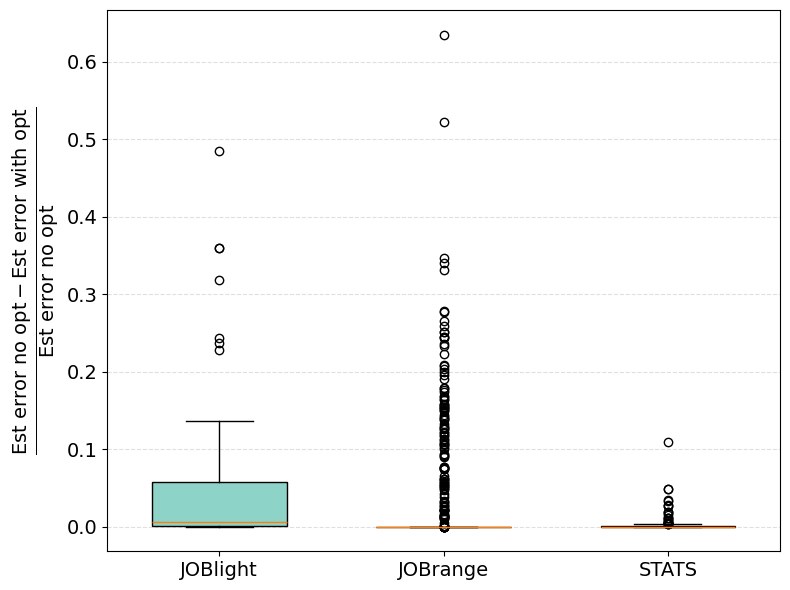

In [18]:

benchmark_name = {
    'joblight': 'JOBlight',
    'jobrange': "JOBrange",
    "stats": "STATS",
}
prefix_degree_sequences_dir = "../results/optimization_analysis/prefix_degree_sequences"


def draw_full_jobjoin_estimates(benchmarks):
    fig, ax = plt.subplots(figsize=(8, 6))
    all_diffs = []
    labels = []

    for i, benchmark in enumerate(benchmarks):
        # Load the data
        df = pd.read_csv(f'{prefix_degree_sequences_dir}/{benchmark}_full_estimations.csv')
        if "cardinality" in df.columns:
            df.drop(columns=['cardinality'], inplace=True)
        
        df2 = pd.read_csv(f'{prefix_degree_sequences_dir}/{benchmark}_full_estimations_partial.csv')
        if "cardinality" in df2.columns:
            df2.drop(columns=['cardinality'], inplace=True)

        cardinality = pd.read_csv(f'{prefix_degree_sequences_dir}/{benchmark}_full_cardinality.csv')

        df = pd.concat([df, df2, cardinality], axis=1)

        # Convert columns to numeric if they exist
        numeric_columns = ['lpbound_no_prefix', 'lpbound_partial', 'cardinality']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            else:
                print(f"Warning: Column '{col}' not found in DataFrame for {benchmark}")

        # Drop rows with NaN values in the numeric columns that exist
        existing_numeric_columns = [col for col in numeric_columns if col in df.columns]
        df.dropna(subset=existing_numeric_columns, inplace=True)

        methods = [
            "lpbound_no_prefix",
            "lpbound_partial",
        ]

        # Only calculate diff if both columns exist
        if 'lpbound_no_prefix' in df.columns and 'lpbound_partial' in df.columns:
            df['diff'] = (df['lpbound_no_prefix'] - df['lpbound_partial']) / df['lpbound_no_prefix']
        else:
            print(f"Warning: Cannot calculate diff for {benchmark} due to missing columns")
            continue

        for method in methods:
            if method in df.columns and 'cardinality' in df.columns:
                # print(f"{method} for {benchmark}:")
                # print(df[method])
                df[method] = df[method] / df['cardinality']
            else:
                print(f"Warning: Cannot calculate {method} for {benchmark} due to missing columns")

        all_diffs.append(df['diff'].dropna())
        labels.append(benchmark_name[benchmark])

    # Create the grouped boxplot
    bp = ax.boxplot(all_diffs, positions=range(1, len(benchmarks) + 1), widths=0.6, patch_artist=True)

    # Customize the boxplot colors
    colors = plt.cm.Set3(np.linspace(0, 1, len(benchmarks)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # ax.set_title('Improvement Across Benchmarks', fontsize=16)
    # ax.set_xlabel('Benchmarks', fontsize=20)
    ax.set_ylabel(r'$\frac{\mathrm{Est\ error\ no\ opt} - \mathrm{Est\ error\ with\ opt}}{\mathrm{Est\ error\ no\ opt}}$', fontsize=20)


    ax.set_xticks(range(1, len(benchmarks) + 1))
    ax.set_xticklabels(labels, rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Add a grid for better readability
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # save the plot to a pdf file
    os.makedirs('plots', exist_ok=True)
    fig.savefig('plots/prefix_optimization.pdf')

# Example usage:
benchmarks = ['joblight', 'jobrange', 'stats']
draw_full_jobjoin_estimates(benchmarks)


## Figure 13.2: Analyze the improvements when using the pkfk propagation optimization

In [19]:
pkfk_propgation_dir = "../results/optimization_analysis/pkfk_propagation"

joblightrange_no_fkpk = pd.read_csv(f'{pkfk_propgation_dir}/jobrange.csv')
joblight_no_fkpk = pd.read_csv(f'{pkfk_propgation_dir}/joblight.csv')
stats_no_fkpk = pd.read_csv(f'{pkfk_propgation_dir}/stats.csv')

joblight = pd.read_csv('../results/accuracy_acyclic/joblight/lpbound_joblight_full_estimations.csv')
joblight_true = pd.read_csv('../results/accuracy_acyclic/joblight/truecardinality_joblight_full_estimations.csv')

joblightranges = pd.read_csv('../results/accuracy_acyclic/jobrange/lpbound_jobrange_full_estimations.csv')
joblightranges_true = pd.read_csv('../results/accuracy_acyclic/jobrange/truecardinality_jobrange_full_estimations.csv')

stats = pd.read_csv('../results/accuracy_acyclic/stats/lpbound_stats_full_estimations.csv')
stats_true = pd.read_csv('../results/accuracy_acyclic/stats/truecardinality_stats_full_estimations.csv')



assert len(joblight) == len(joblight_true) == len(joblight_no_fkpk)
joblight_df = pd.concat([joblight, joblight_true, joblight_no_fkpk], axis=1)
joblight_df["lpbound"] = joblight_df["lpbound_Estimate"] / joblight_df["truecardinality_Estimate"]
joblight_df["lpbound_without_fkpk"] = joblight_df["lpbound_without_fkpk"] / joblight_df["truecardinality_Estimate"]


assert len(joblightranges) == len(joblightranges_true) == len(joblightrange_no_fkpk)
joblightranges_df = pd.concat([joblightranges, joblightranges_true, joblightrange_no_fkpk], axis=1)
joblightranges_df["lpbound"] = joblightranges_df["lpbound_Estimate"] / joblightranges_df["truecardinality_Estimate"]

assert len(stats) == len(stats_true) == len(stats_no_fkpk)
stats_df = pd.concat([stats, stats_true, stats_no_fkpk], axis=1)
stats_df["lpbound"] = stats_df["lpbound_Estimate"] / stats_df["truecardinality_Estimate"]
stats_df["lpbound_without_fkpk"] = stats_df["lpbound_without_fkpk"] / stats_df["truecardinality_Estimate"]


/tmp/ipykernel_4045271/3933571289.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('Set2')(np.linspace(0, 1, 8))


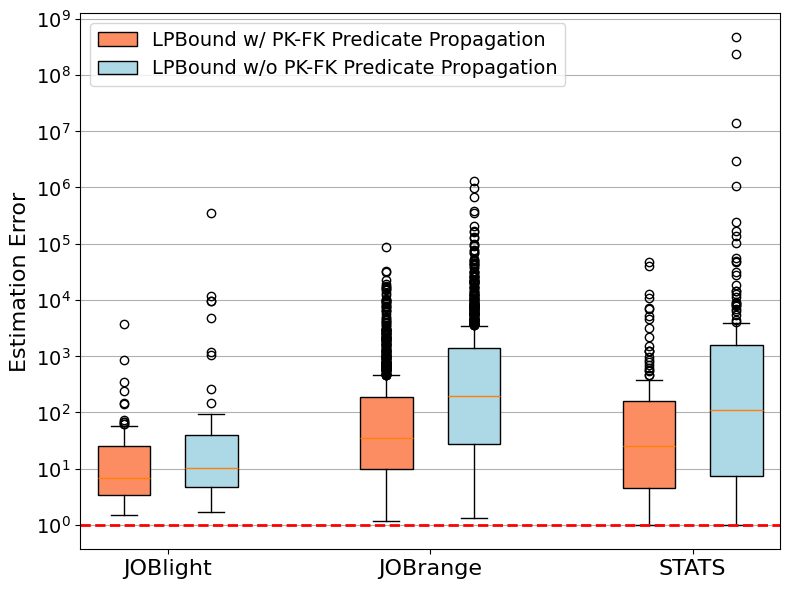

In [20]:

def create_grouped_boxplot(*args):
    if len(args) % 2 != 0:
        raise ValueError("Please provide an even number of arguments: dataframes followed by their respective benchmark names.")
    
    num_groups = len(args) // 2
    dfs = args[:num_groups]
    benchmarks = args[num_groups:]

    color_palette = plt.cm.get_cmap('Set2')(np.linspace(0, 1, 8))
    
    fig, ax = plt.subplots(figsize=(8, 6))

    positions = []
    bplots = []
    
    for i in range(num_groups):
        group_positions = [i*3 + 1, i*3 + 2]
        positions.extend(group_positions)
        
        bp = ax.boxplot([dfs[i]['lpbound'], dfs[i]['lpbound_without_fkpk']], 
                        positions=group_positions, widths=0.6, patch_artist=True)
        bplots.append(bp)

    # Customize colors
    colors = [color_palette[1], 'lightblue']
    for bplot in bplots:
        bplot['boxes'][0].set_facecolor(colors[0])  # lpbound
        bplot['boxes'][1].set_facecolor(colors[1])  # lpbound_without_fkpk

    # Set labels and title
    ax.set_ylabel('Estimation Error', fontsize=16)

    # Set x-ticks and labels
    ax.set_xticks([i*3 + 1.5 for i in range(num_groups)])
    ax.set_xticklabels(benchmarks, fontsize=16)

    # Add a legend for columns
    ax.legend([bplots[0]["boxes"][0], bplots[0]["boxes"][1]], 
              ['LPBound w/ PK-FK Predicate Propagation', 'LPBound w/o PK-FK Predicate Propagation'], 
              fontsize=14, loc='upper left')

    # Add grid lines for better readability
    ax.yaxis.grid(True)

    # log scale for y-axis with more ticks
    ax.set_yscale('log')
    
    # Set y-ticks to show more labels
    y_ticks = [10**i for i in range(0, 10)]  # Adjust the range as needed
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'$10^{i}$' for i in range(0, 10)])

    # y-axis font size
    ax.tick_params(axis='y', labelsize=14)

    # add a horizontal line at y=1 thicker
    ax.axhline(y=1, color='r', linestyle='--', linewidth=2)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # save the plot to a pdf file
    os.makedirs('plots', exist_ok=True)
    fig.savefig('plots/pkfk_optimization.pdf')
    

# Call the function with your dataframes
create_grouped_boxplot(joblight_df, joblightranges_df, stats_df,
                       'JOBlight', 'JOBrange', 'STATS')

# create_grouped_boxplot(joblight_df, stats_df,
#                        'JOBlight', 'STATS')